In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

file_to_load = "crash_info.csv"

# Read Purchasing File and store into Pandas data frame
crash_data = pd.read_csv(file_to_load)
crash_data.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [8]:
severity_groupby=crash_data.groupby("SEVERITY")
severity_count=severity_groupby["ACC_ID"].nunique()
severity_count


SEVERITY
Fatal          746
Hospital      6928
Medical      17779
PDO Major    72991
PDO Minor    38232
Name: ACC_ID, dtype: int64

In [9]:
crash_count = len(crash_data["ACC_ID"].unique())
crash_count


136676

In [10]:
fatal = crash_data.loc[crash_data["SEVERITY"] == "Fatal"]
fatal_count = len(fatal["ACC_ID"].unique())
fatal_count

hospital = crash_data.loc[crash_data["SEVERITY"] == "Hospital"]
hospital_count = len(hospital["ACC_ID"].unique())
hospital_count  

medical = crash_data.loc[crash_data["SEVERITY"] == "Medical"]
medical_count = len(medical["ACC_ID"].unique())
medical_count

PDO_MAJOR = crash_data.loc[crash_data["SEVERITY"] == "PDO Major"]
major_count = len(PDO_MAJOR["ACC_ID"].unique())
major_count

PDO_MINOR = crash_data.loc[crash_data["SEVERITY"] == "PDO Minor"]
minor_count = len(PDO_MINOR["ACC_ID"].unique())
minor_count

fatal_percentage = "{:.2f}%".format(fatal_count / crash_count * 100)
fatal_percentage

hospital_percentage = "{:.2f}%".format(hospital_count / crash_count * 100)
hospital_percentage

medical_percentage = "{:.2f}%".format(medical_count / crash_count * 100)
medical_percentage

major_percentage = "{:.2f}%".format(major_count / crash_count * 100)
major_percentage

minor_percentage = "{:.2f}%".format(minor_count / crash_count * 100)
minor_percentage

severity_summary = pd.DataFrame({
    "severity category":["Fatal", "Hospital", "Medical", "PDO Major", "PDO Minor"],
    "Total Count":[fatal_count, hospital_count, medical_count, major_count, minor_count],
    "Percentage of Severity":[fatal_percentage, hospital_percentage, medical_percentage, major_percentage, minor_percentage],})

severity_summary=severity_summary.set_index("severity category")
severity_summary.index.name = None
severity_summary


,Total Count,Percentage of Severity
Fatal,746,0.55%
Hospital,6928,5.07%
Medical,17779,13.01%
PDO Major,72991,53.40%
PDO Minor,38232,27.97%


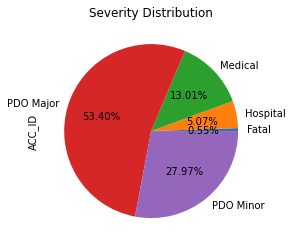

In [14]:
severity_data = crash_data.groupby('SEVERITY').count()['ACC_ID']
severity_df = pd.DataFrame(severity_data)
severity_df

plt.pie(severity_data,labels=severity_data.index,autopct='%.2f%%')
plt.title('Severity Distribution')
plt.ylabel('ACC_ID')
plt.show()